VOIS AICTE MAJOR
Project: Netflix Dataset Analysis

Prepared for: VOIS AICTE Internship

Prepared by: RAJ JET SONKAR

Generated on: 2025-10-24 08:36:55

1.Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

2. Load Dataset

In [ ]:
df = pd.read_csv("Netflix Dataset.csv")

3.DataSet Overview

In [ ]:
df.shape

(7789, 11)

In [ ]:
df.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [ ]:
df.isna().sum()

,0
Show_Id,0
Category,0
Title,0
Director,2388
Cast,718
Country,507
Release_Date,10
Rating,7
Duration,0
Type,0


In [ ]:
df.dropna(inplace=True)

In [ ]:

df.isna().sum()

,0
Show_Id,0
Category,0
Title,0
Director,0
Cast,0
Country,0
Release_Date,0
Rating,0
Duration,0
Type,0


In [ ]:
df.shape

(4807, 14)

In [ ]:
df.describe()

,Release_Date,Duration_num,Duration_final,Year
count,4807,4807.000000,4807.000000,4807.000000
mean,2019-01-08 19:34:17.249843968,99.636988,104.749665,2018.516122
min,2008-01-01 00:00:00,1.000000,8.000000,2008.000000
25%,2018-03-01 00:00:00,88.000000,89.000000,2018.000000
50%,2019-03-03 00:00:00,99.000000,100.000000,2019.000000
75%,2020-01-07 00:00:00,116.000000,117.000000,2020.000000
max,2021-01-16 00:00:00,253.000000,1489.598438,2021.000000
std,NaN,30.805329,45.094592,1.381805


In [ ]:
df.head(5)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Duration_num,Duration_final,Year
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,93.0,93.000000,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",78.0,78.000000,2018.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",80.0,80.000000,2017.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,123.0,123.000000,2020.0
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,1.0,99.306563,2017.0


In [ ]:
cols=['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description']

In [ ]:
for col in cols:
    print(df[col].value_counts())
    print("----"*5)

Show_Id
s684     2
s6621    2
s5172    1
s5171    1
s5169    1
        ..
s2554    1
s2552    1
s2551    1
s2550    1
s2565    1
Name: count, Length: 4805, dtype: int64
--------------------
Category
Movie      4675
TV Show     132
Name: count, dtype: int64
--------------------
Title
Backfire                           2
The Lost Okoroshi                  2
Results                            1
Restless Creature: Wendy Whelan    1
Residue                            1
                                  ..
Guna 369                           1
Gun City                           1
Gumrah                             1
Guilty                             1
Héroes                             1
Name: count, Length: 4805, dtype: int64
--------------------
Director
Raúl Campos, Jan Suter    18
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
                          ..
Oskar Santos               1
Floyd Russ                 1
Majid A

4.data visualization

<Axes: xlabel='Category', ylabel='count'>

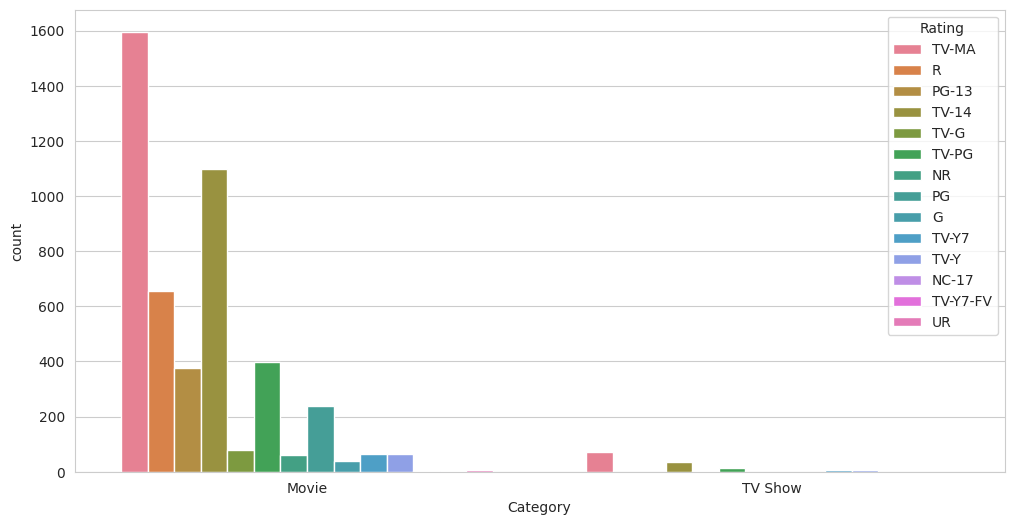

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Category'],hue=df['Rating'])

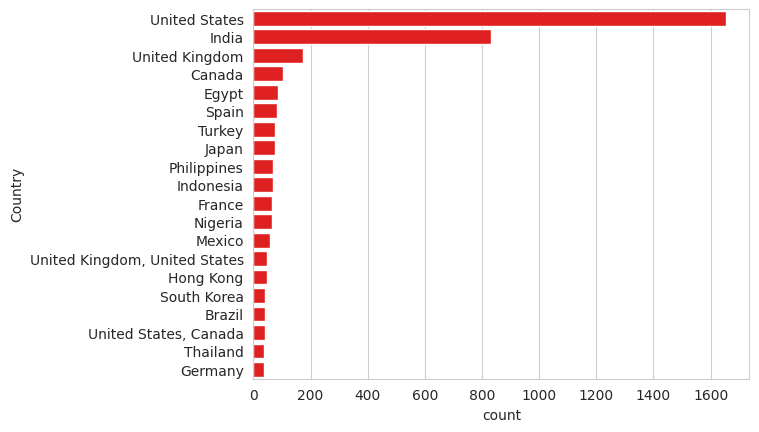

In [ ]:
top_cats = df['Country'].value_counts().head(20).index
sns.countplot(y='Country', data=df[df['Country'].isin(top_cats)], order=top_cats,color='red')
plt.show()

In [ ]:
df['Duration_num'] = df['Duration'].astype(str).str.extract('(\d+)').astype(float)
mean_duration = df.loc[df['Duration'].str.contains('min', na=False), 'Duration_num'].mean()
def convert_duration(x):
    if pd.isna(x):
        return np.nan
    x = str(x)
    if 'min' in x:
        return int(x.replace('min', '').strip())
    elif 'Season' in x:
        # Extract the number before 'Season(s)' (default 1 if not present)
        n_seasons = int(''.join(filter(str.isdigit, x)) or 1)
        return n_seasons * mean_duration
    else:
        return np.nan
df['Duration_final'] = df['Duration'].apply(convert_duration)
df = df.dropna(subset=['Duration_final']).reset_index(drop=True)
print(df[['Duration', 'Duration_final']])

      Duration  Duration_final
0       93 min       93.000000
1       78 min       78.000000
2       80 min       80.000000
3      123 min      123.000000
4     1 Season      102.396791
...        ...             ...
4802    88 min       88.000000
4803    94 min       94.000000
4804    88 min       88.000000
4805    99 min       99.000000
4806   111 min      111.000000

[4807 rows x 2 columns]


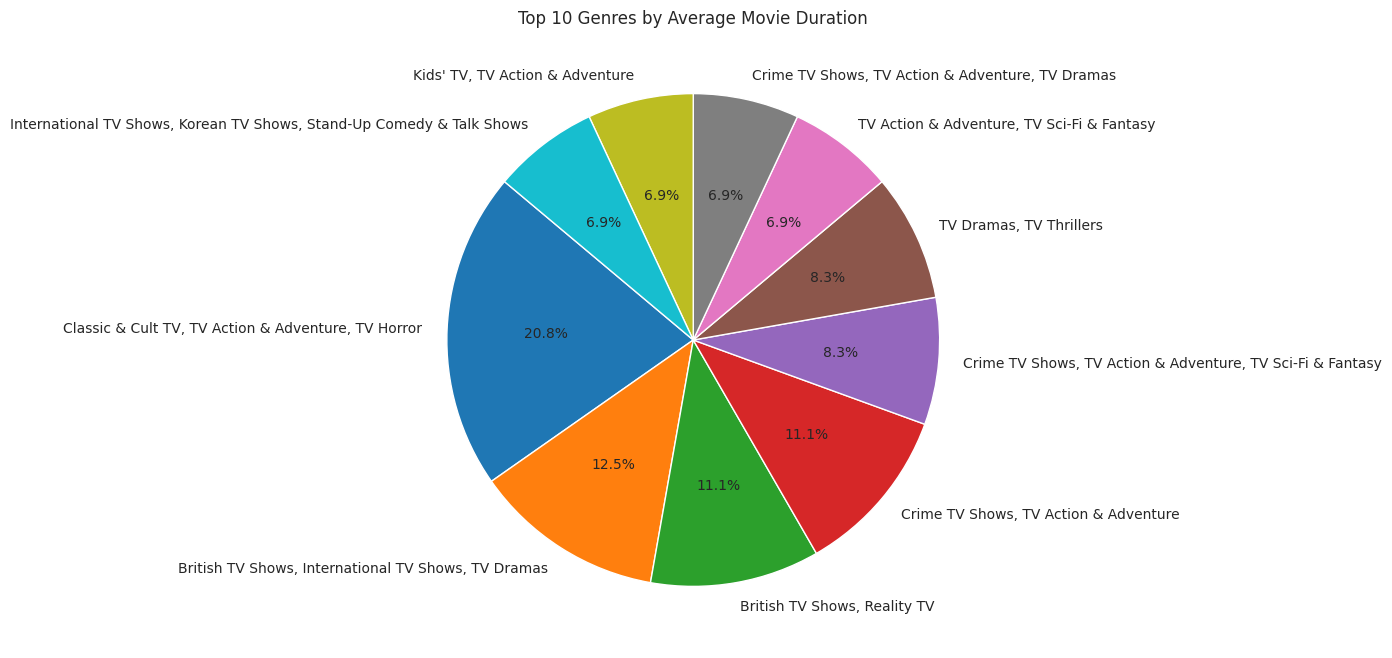

In [ ]:
avg_duration = df.groupby('Type')['Duration_final'].mean()
top_n = 10
avg_duration = avg_duration.sort_values(ascending=False).head(top_n)
plt.figure(figsize=(8, 8))
plt.pie(avg_duration, labels=avg_duration.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Top {top_n} Genres by Average Movie Duration')
plt.show()

In [ ]:
top_country=df.groupby('Category')['Country']
top_country.value_counts()

Category  Country                                                      
Movie     United States                                                    1628
          India                                                             827
          United Kingdom                                                    155
          Canada                                                            101
          Egypt                                                              87
                                                                           ... 
TV Show   United Kingdom, Germany, United States, France                      1
          United Kingdom, Ireland, United States                              1
          United Kingdom, United States, Spain, Germany, Greece, Canada       1
          United States, Ireland                                              1
          United States, Israel, Italy, South Africa                          1
Name: count, Length: 576, dtype: int64

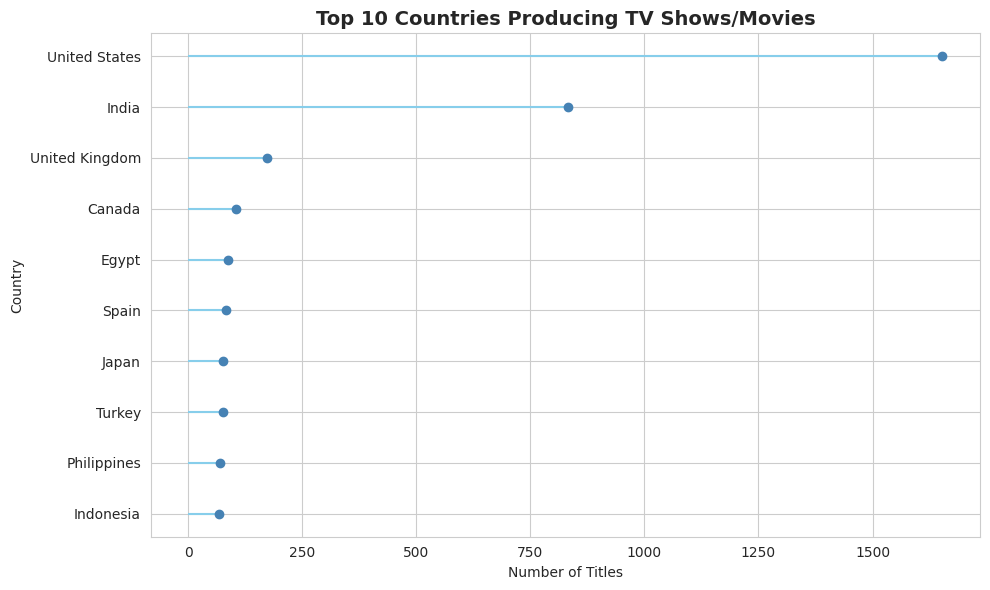

In [ ]:
country_count = df['Country'].value_counts().head(10).reset_index()
country_count.columns = ['Country', 'Count']
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
country_count = country_count.sort_values('Count')
plt.hlines(y=country_count['Country'], xmin=0, xmax=country_count['Count'], color='skyblue')
plt.plot(country_count['Count'], country_count['Country'], "o", color='steelblue')
plt.title("Top 10 Countries Producing TV Shows/Movies", fontsize=14, weight='bold')
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

<Axes: xlabel='Duration_final', ylabel='Rating'>

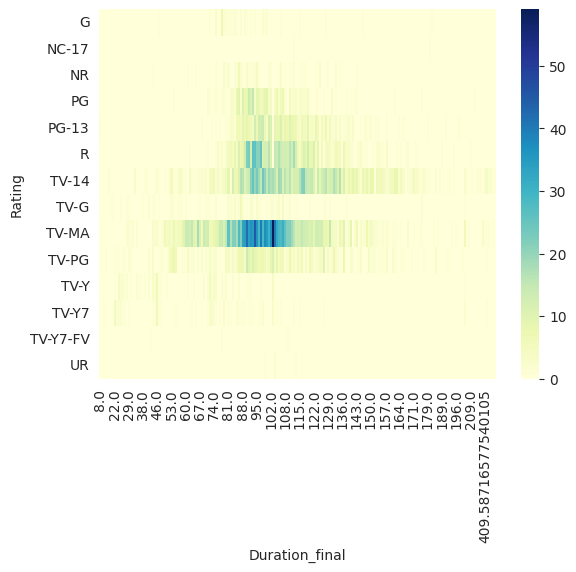

In [ ]:
heat_data = df.groupby(['Rating','Duration_final']).size().unstack(fill_value=0)
sns.heatmap(heat_data, cmap='YlGnBu')

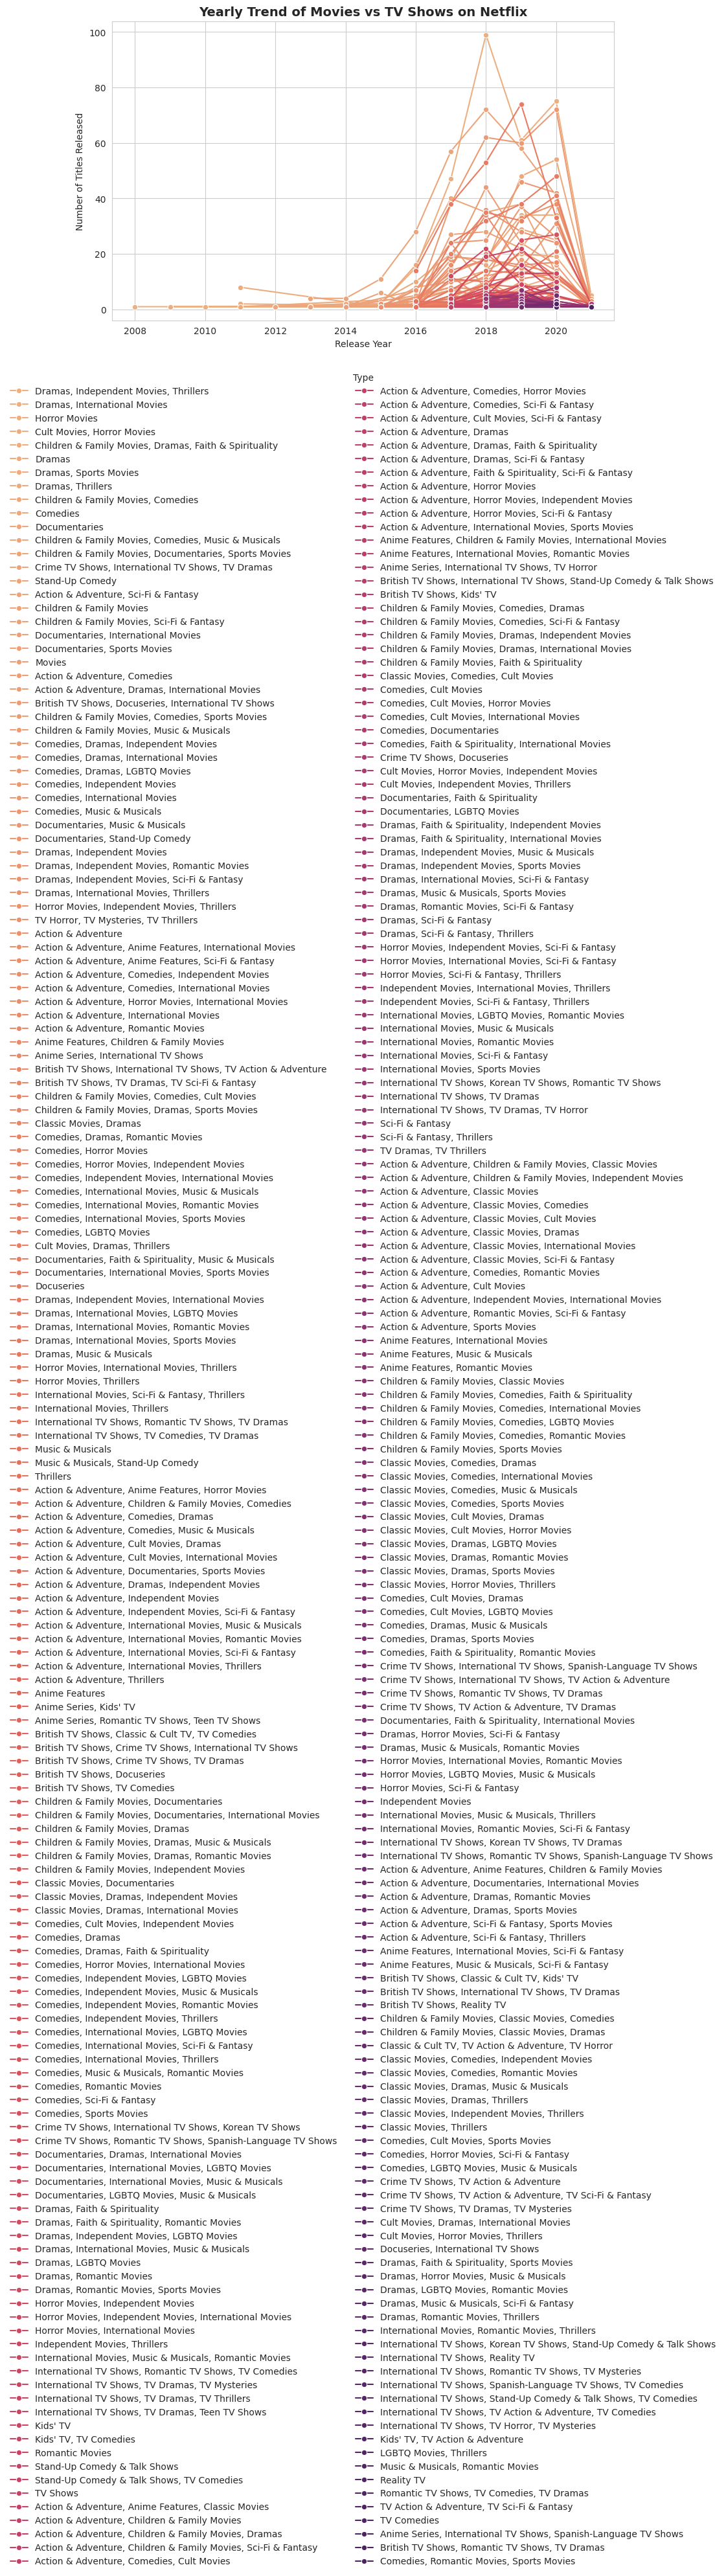

In [ ]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], format='%B %d, %Y', errors='coerce')

# Extract year
df['Year'] = df['Release_Date'].dt.year

# Drop rows where Year couldn't be parsed
df = df.dropna(subset=['Year'])

# Group and count titles per year and type
yearly = df.groupby(['Year', 'Type']).size().reset_index(name='Count')

# Plot
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

sns.lineplot(
    data=yearly,
    x='Year',
    y='Count',
    hue='Type',
    marker='o',
    palette='flare'
)

plt.title("Yearly Trend of Movies vs TV Shows on Netflix", fontsize=14, weight='bold')
plt.xlabel("Release Year")
plt.ylabel("Number of Titles Released")
plt.legend(
    title='Type',
    loc='upper center',       # Centered horizontally
    bbox_to_anchor=(0.5, -0.15),  # Move below the plot
    ncol=2,                   # Two columns (Movies | TV Shows)
    frameon=False
)
plt.tight_layout()
plt.show()